In [17]:
import pickle
import os
import ast
import json
import nltk
import string
import gensim
import pickle
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.svm import SVR
from textblob import TextBlob
import matplotlib.pyplot as plt
from sklearn import preprocessing
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from sklearn.linear_model import Ridge
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from scipy.stats.mstats import winsorize
import sklearn.feature_extraction.text as text
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from nltk.stem import SnowballStemmer,PorterStemmer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import  GridSearchCV, train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
import warnings
warnings.simplefilter("ignore")
# Download required resources (only needed once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Family\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Family\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Family\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Test Data Preprocessing

### Data Gathering and merge

In [18]:
test_data = pd.read_csv("D:\M1\movies-tas-test.csv");

In [19]:
credits = pd.read_csv("D:\M1\credit-tas-test.csv");

In [20]:
credits.rename(columns = {'movie_id':'id'}, inplace = True)

In [21]:
test_data = test_data.merge(credits,on='id')

In [22]:
test_data.drop(columns=['id','title_x'],inplace=True)
test_data.rename(columns={'title_y':'title'},inplace=True)
test_data.drop(columns=['title','original_title', 'overview','homepage','tagline', 'status'],inplace=True)

In [23]:
Y = test_data['vote_average']
test_data = test_data.drop(axis=1, columns=['vote_average'])

In [24]:
test_data.head()

,budget,genres,keywords,original_language,viewercount,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_count,Unnamed: 0,cast,crew
0,30000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...","[{""id"": 90, ""name"": ""paris""}, {""id"": 212, ""nam...",en,27.230493,"[{""name"": ""Eon Productions"", ""id"": 7576}]","[{""iso_3166_1"": ""FR"", ""name"": ""France""}, {""iso...",5/24/1985,152427960,131,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",506,1586.0,"[{""cast_id"": 16, ""character"": ""James Bond"", ""c...","[{""credit_id"": ""52fe426dc3a36847f801deb5"", ""de..."
1,60000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 855, ""name"": ""fictional place""}, {""id""...",en,15.406173,"[{""name"": ""Boll Kino Beteiligungs GmbH & Co. K...","[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}, {""iso...",11/29/2007,0,127,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",224,784.0,"[{""cast_id"": 13, ""character"": ""Farmer"", ""credi...","[{""credit_id"": ""52fe434dc3a36847f8049dd7"", ""de..."
2,16000000,"[{""id"": 27, ""name"": ""Horror""}]","[{""id"": 1583, ""name"": ""mass murder""}, {""id"": 3...",en,21.380635,"[{""name"": ""New Line Cinema"", ""id"": 12}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10/6/2006,0,91,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",402,2462.0,"[{""cast_id"": 13, ""character"": ""Chrissie"", ""cre...","[{""credit_id"": ""558fcc249251414508000763"", ""de..."
3,20000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...","[{""id"": 10051, ""name"": ""heist""}, {""id"": 10085,...",en,29.371987,"[{""name"": ""Worldview Entertainment"", ""id"": 901...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2/19/2016,12639297,115,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",797,2212.0,"[{""cast_id"": 5, ""character"": ""Chris Allen"", ""c...","[{""credit_id"": ""56c9ca00c3a36840910077a5"", ""de..."
4,40000000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 9648, ""n...","[{""id"": 830, ""name"": ""car race""}, {""id"": 3737,...",en,32.478077,"[{""name"": ""New Line Cinema"", ""id"": 12}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",8/26/2009,186167139,82,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",831,1186.0,"[{""cast_id"": 1, ""character"": ""Nick O'Bannon"", ...","[{""credit_id"": ""52fe47f89251416c750ab9e7"", ""de..."


In [25]:
Y.head()

0    6.0
1    4.1
2    5.9
3    5.6
4    5.4
Name: vote_average, dtype: float64

In [26]:
#check the missing values
print(test_data.isnull().sum().to_string())

budget                  0
genres                  0
keywords                0
original_language       0
viewercount             0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
vote_count              0
Unnamed: 0              0
cast                    0
crew                    0


In [27]:
# date extraction
test_data['day'] = pd.to_datetime(test_data['release_date']).dt.day # drop if it is not needed
test_data['month'] = pd.to_datetime(test_data['release_date']).dt.month
test_data['year'] = pd.to_datetime(test_data['release_date']).dt.year

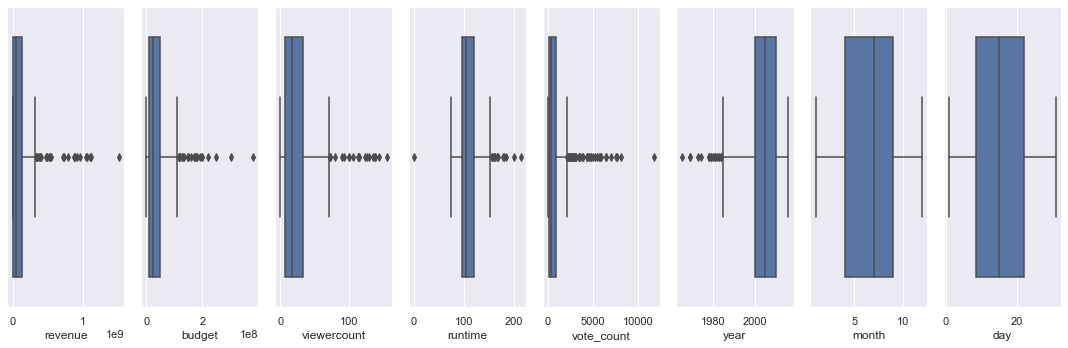

In [28]:
#checking outliers
sns.set()
fig, axs = plt.subplots(1,8, figsize = (15,5))
plt1 = sns.boxplot(test_data['revenue'], ax = axs[0])
plt2 = sns.boxplot(test_data['budget'], ax = axs[1])
plt3 = sns.boxplot(test_data['viewercount'], ax = axs[2])
plt4 = sns.boxplot(test_data['runtime'], ax = axs[3])
plt5 = sns.boxplot(test_data['vote_count'], ax = axs[4])
plt6 = sns.boxplot(test_data['year'], ax = axs[5])
plt7 = sns.boxplot(test_data['month'], ax = axs[6])
plt8 = sns.boxplot(test_data['day'], ax = axs[7])

plt.tight_layout()

In [29]:
def replace_test_outlier(col,limits):
    test_data.loc[test_data[col] > limits[0],col]=limits[0]
    test_data.loc[test_data[col] < limits[1],col]=limits[1]

In [30]:
limit_values = pickle.load(open("limit_values.pkl", "rb"))

In [31]:
outliers_column=['revenue','budget','runtime','vote_count','viewercount','year']
i = 0
for col in outliers_column:
    replace_test_outlier(col,limit_values[i])
    i += 1

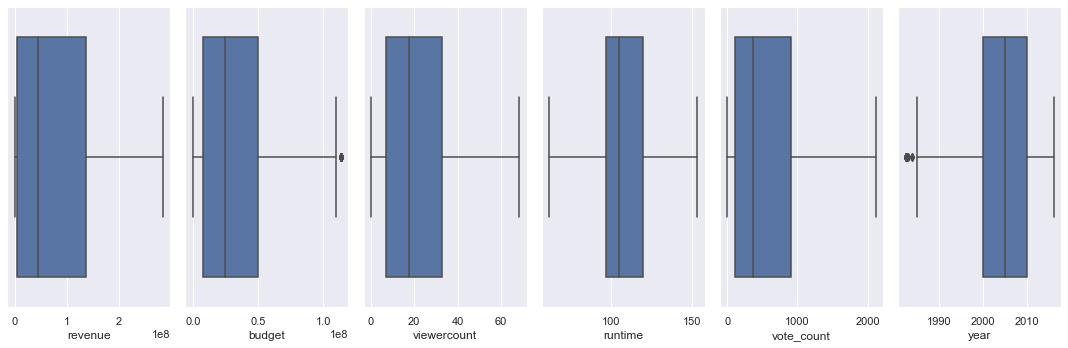

In [32]:
#checking outliers
sns.set()
fig, axs = plt.subplots(1,6, figsize = (15,5))
plt1 = sns.boxplot(test_data['revenue'], ax = axs[0])
plt2 = sns.boxplot(test_data['budget'], ax = axs[1])
plt3 = sns.boxplot(test_data['viewercount'], ax = axs[2])
plt4 = sns.boxplot(test_data['runtime'], ax = axs[3])
plt5 = sns.boxplot(test_data['vote_count'], ax = axs[4])
plt6 = sns.boxplot(test_data['year'], ax = axs[5])
plt.tight_layout()

In [33]:
date_mode = pickle.load(open("date_mode.pkl", "rb"))
runtime_mean = pickle.load(open("runtime_mean.pkl", "rb"))
vote_count_med = pickle.load(open("vote_count_med.pkl", "rb"))
viewer_count_med = pickle.load(open("viewer_count_med.pkl", "rb"))
revnue_med = pickle.load(open("revnue_med.pkl", "rb"))
OL_mode = pickle.load(open("OL_mode.pkl", "rb"))
budget_mean = pickle.load(open("budget_mean.pkl", "rb"))
sorted_corr = pickle.load(open("sorted_corr.pkl", "rb"))
saved_fitted_data = pickle.load(open("saved_fitted_data.pkl", "rb"))

In [34]:
test_data['release_date'].fillna(value=date_mode, inplace=True)
test_data['release_date'].replace(0, date_mode, inplace=True)

In [35]:
test_data['runtime'].replace(0,runtime_mean,inplace=True)
test_data['runtime'].fillna(value=runtime_mean, inplace=True)

In [36]:
test_data['vote_count'].fillna(value=vote_count_med, inplace=True)
test_data['vote_count'].replace(0, vote_count_med, inplace=True)

In [37]:
test_data['viewercount'].fillna(value=viewer_count_med, inplace=True)
test_data['viewercount'].replace(0, viewer_count_med, inplace=True)

In [38]:
test_data['revenue'].fillna(value=revnue_med, inplace=True)
test_data['revenue'].replace(0, revnue_med, inplace=True)

In [39]:
test_data['budget'].dtype

dtype('int64')

In [40]:
test_data['original_language'] = test_data['original_language'].apply(lambda x: OL_mode if str(x).isdigit() else x)

In [41]:
test_data.head()

,budget,genres,keywords,original_language,viewercount,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_count,Unnamed: 0,cast,crew,day,month,year
0,30000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...","[{""id"": 90, ""name"": ""paris""}, {""id"": 212, ""nam...",en,27.230493,"[{""name"": ""Eon Productions"", ""id"": 7576}]","[{""iso_3166_1"": ""FR"", ""name"": ""France""}, {""iso...",5/24/1985,152427960.0,131.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",506.0,1586.0,"[{""cast_id"": 16, ""character"": ""James Bond"", ""c...","[{""credit_id"": ""52fe426dc3a36847f801deb5"", ""de...",24,5,1985.0
1,60000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 855, ""name"": ""fictional place""}, {""id""...",en,15.406173,"[{""name"": ""Boll Kino Beteiligungs GmbH & Co. K...","[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}, {""iso...",11/29/2007,35287788.0,127.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",224.0,784.0,"[{""cast_id"": 13, ""character"": ""Farmer"", ""credi...","[{""credit_id"": ""52fe434dc3a36847f8049dd7"", ""de...",29,11,2007.0
2,16000000,"[{""id"": 27, ""name"": ""Horror""}]","[{""id"": 1583, ""name"": ""mass murder""}, {""id"": 3...",en,21.380635,"[{""name"": ""New Line Cinema"", ""id"": 12}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10/6/2006,35287788.0,91.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",402.0,2462.0,"[{""cast_id"": 13, ""character"": ""Chrissie"", ""cre...","[{""credit_id"": ""558fcc249251414508000763"", ""de...",6,10,2006.0
3,20000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...","[{""id"": 10051, ""name"": ""heist""}, {""id"": 10085,...",en,29.371987,"[{""name"": ""Worldview Entertainment"", ""id"": 901...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2/19/2016,12639297.0,115.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",797.0,2212.0,"[{""cast_id"": 5, ""character"": ""Chris Allen"", ""c...","[{""credit_id"": ""56c9ca00c3a36840910077a5"", ""de...",19,2,2016.0
4,40000000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 9648, ""n...","[{""id"": 830, ""name"": ""car race""}, {""id"": 3737,...",en,32.478077,"[{""name"": ""New Line Cinema"", ""id"": 12}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",8/26/2009,186167139.0,82.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",831.0,1186.0,"[{""cast_id"": 1, ""character"": ""Nick O'Bannon"", ...","[{""credit_id"": ""52fe47f89251416c750ab9e7"", ""de...",26,8,2009.0


In [42]:
test_data['budget'].fillna(value=budget_mean, inplace=True)
test_data['budget'].replace(0, budget_mean, inplace=True)

In [43]:
from sklearn.preprocessing import LabelEncoder
# Load the encoder from the file
with open('encoder.pkl', 'rb') as f:
    encoder = pickle.load(f)

# Use the loaded encoder to transform the test set
test_data['original_language'] = encoder.transform(test_data[['original_language']])

In [44]:
json_cols = ['genres', 'keywords', 'production_companies', 'spoken_languages', 'production_countries']

def extract_keywords(x):
    L=[]
    counter = 0
    for i in ast.literal_eval(x):
        if counter < 3:
            L.append(i['name'])
        counter+=1
    return L
for col in json_cols:
    test_data[col]=test_data[col].apply(extract_keywords)


def convert3(text):
    L = []
    counter = 0
    for i in ast.literal_eval(text):
        if counter < 3:
            L.append(i['name'])
        counter+=1
    return L


test_data['cast']=test_data['cast'].apply(convert3)

def fetch_director(text):
    L = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            L.append(i['name'])      
    return L
    

test_data['crew']=test_data['crew'].apply(fetch_director)


In [45]:
test_data.head()

,budget,genres,keywords,original_language,viewercount,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_count,Unnamed: 0,cast,crew,day,month,year
0,30000000.0,"[Adventure, Action, Thriller]","[paris, london england, france]",4.0,27.230493,[Eon Productions],"[France, Iceland, United Kingdom]",5/24/1985,152427960.0,131.0,[English],506.0,1586.0,"[Roger Moore, Christopher Walken, Tanya Roberts]",[John Glen],24,5,1985.0
1,60000000.0,"[Adventure, Fantasy, Action]","[fictional place, monster, loss of family]",4.0,15.406173,"[Boll Kino Beteiligungs GmbH & Co. KG, Brightl...","[Canada, Germany, United States of America]",11/29/2007,35287788.0,127.0,[English],224.0,784.0,"[Jason Statham, John Rhys-Davies, Ray Liotta]",[Uwe Boll],29,11,2007.0
2,16000000.0,[Horror],"[mass murder, planned murder, chain saw]",4.0,21.380635,"[New Line Cinema, Next Entertainment, Platinum...",[United States of America],10/6/2006,35287788.0,91.0,[English],402.0,2462.0,"[Jordana Brewster, Taylor Handley, Diora Baird]",[Jonathan Liebesman],6,10,2006.0
3,20000000.0,"[Action, Thriller]","[heist, betrayal, dirty cop]",4.0,29.371987,"[Worldview Entertainment, Anonymous Content, M...",[United States of America],2/19/2016,12639297.0,115.0,[English],797.0,2212.0,"[Casey Affleck, Chiwetel Ejiofor, Woody Harrel...",[John Hillcoat],19,2,2016.0
4,40000000.0,"[Horror, Mystery]","[car race, dying and death, plan]",4.0,32.478077,"[New Line Cinema, Practical Pictures, Parallel...",[United States of America],8/26/2009,186167139.0,82.0,[English],831.0,1186.0,"[Bobby Campo, Shantel VanSanten, Nick Zano]",[David R. Ellis],26,8,2009.0


In [46]:
class Our_OneHotEncoder:
    data = set()
    
    def __init__(self):
        self.data.clear()
    
    def fit_freq(self, freq_set):
        # adding items to data field
        self.data = freq_set
    
    def fit(self, df, column_name):
        # adding items to data field
        for lst in df[column_name]:
            for element in lst:
                self.data.add(element)

    def transform(self, df, column_name):
        data_lst = list(self.data)
        
        #Initializing the one-hot columns
        for col in data_lst:
            df[col] = np.zeros(df.shape[0], dtype=int)
        
        # One-Hot Encoding
        for i, row in df.iterrows():
            for element in row[column_name]:
                if element in data_lst:
                    df.loc[i, element] = 1
        df.drop(columns=[column_name],inplace=True)    


In [47]:
oneHotColumns=['genres', 'production_countries']
i = 0
for col in oneHotColumns:
    encoder = Our_OneHotEncoder()
    encoder.data = set(saved_fitted_data[i])
    encoder.transform(test_data,col)
    i+=1 


In [48]:
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)
test_data[['budget','viewercount','revenue','runtime','vote_count','year','month','day']]=scaler.transform(test_data[['budget','viewercount','revenue','runtime','vote_count','year','month','day']])

In [49]:
test_data.columns

Index(['budget', 'keywords', 'original_language', 'viewercount',
       'production_companies', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'vote_count', 'Unnamed: 0', 'cast', 'crew', 'day',
       'month', 'year', 'War', 'Family', 'Romance', 'Drama', 'Music', 'Crime',
       'Foreign', 'Documentary', 'Thriller', 'Comedy', 'Mystery', 'History',
       'Animation', 'Western', 'Horror', 'Adventure', 'Action',
       'Science Fiction', 'Fantasy', 'United Arab Emirates',
       'Bosnia and Herzegovina', 'Mexico', 'France', 'Australia',
       'Switzerland', 'Malaysia', 'Netherlands', 'Bolivia', 'Finland', 'India',
       'Ukraine', 'Malta', 'Spain', 'United States of America', 'Italy',
       'Sweden', 'Japan', 'Russia', 'Hong Kong', 'Israel', 'Taiwan',
       'Kazakhstan', 'Austria', 'Morocco', 'New Zealand', 'Czech Republic',
       'Thailand', 'Philippines', 'Chile', 'Libyan Arab Jamahiriya', 'Monaco',
       'Iceland', 'Bulgaria', 'Fiji', 'Cambodia', 'Norway', 'Pol

In [50]:
test_data.head()

,budget,keywords,original_language,viewercount,production_companies,release_date,revenue,runtime,spoken_languages,vote_count,...,Panama,Pakistan,South Africa,Luxembourg,Brazil,Aruba,Bahamas,South Korea,Jamaica,Belgium
0,-0.272600,"[paris, london england, france]",4.0,0.277186,[Eon Productions],5/24/1985,0.832208,1.242552,[English],-0.164813,...,0,0,0,0,0,0,0,0,0,0
1,0.731556,"[fictional place, monster, loss of family]",4.0,-0.350801,"[Boll Kino Beteiligungs GmbH & Co. KG, Brightl...",11/29/2007,-0.438992,1.017721,[English],-0.581185,...,0,0,0,0,0,0,0,0,0,0
2,-0.741207,"[mass murder, planned murder, chain saw]",4.0,-0.033499,"[New Line Cinema, Next Entertainment, Platinum...",10/6/2006,-0.438992,-1.005761,[English],-0.318369,...,0,0,0,0,0,0,0,0,0,0
3,-0.607319,"[heist, betrayal, dirty cop]",4.0,0.390920,"[Worldview Entertainment, Anonymous Content, M...",2/19/2016,-0.684772,0.343227,[English],0.264848,...,0,0,0,0,0,0,0,0,0,0
4,0.062119,"[car race, dying and death, plan]",4.0,0.555884,"[New Line Cinema, Practical Pictures, Parallel...",8/26/2009,1.198344,-1.511632,[English],0.315048,...,0,0,0,0,0,0,0,0,0,0


In [51]:
sorted_corr[:-17]

runtime           0.428847
vote_count        0.393845
viewercount       0.388015
Drama             0.268935
revenue           0.230377
                    ...   
Netherlands       0.010608
Thriller          0.010366
Czech Republic    0.010199
Singapore         0.009193
Bolivia           0.009193
Length: 70, dtype: float64

In [52]:
test_data = test_data[sorted_corr[:-17].keys()]

In [53]:
def model_pred(model,data):
    y_pred = model.predict(data)
    # Evaluate the model
    print("MSE: ", mean_squared_error(Y, y_pred))
    print("RMSE: ", np.sqrt(mean_squared_error(Y, y_pred)))
    print(f"R^2: {(r2_score(Y, y_pred)):.2f}")


In [54]:
#SVR
with open('svr.pkl', 'rb') as f:
    svr = pickle.load(f)
model_pred(svr,test_data)

MSE:  0.44226170950577687
RMSE:  0.6650276005593879
R^2: 0.47


In [55]:
# ridge
with open('ridge.pkl', 'rb') as f:
    ridge = pickle.load(f)   
model_pred(ridge,test_data)

MSE:  0.44565658224436233
RMSE:  0.6675751510087552
R^2: 0.47


In [56]:
# pca
with open('pca.pkl', 'rb') as f:
    pca = pickle.load(f)  

with open('linear_pca.pkl', 'rb') as f:
    Linear_pca = pickle.load(f)
   
# Transform the test data using the same PCA transformation
X_test_pca = pca.transform(test_data)
model_pred(Linear_pca,X_test_pca)

MSE:  0.45112772029220566
RMSE:  0.671660420370447
R^2: 0.46


In [57]:
# elastic
with open('elastic.pkl', 'rb') as f:
    elastic = pickle.load(f)   
model_pred(elastic,test_data)

MSE:  0.4482577058085006
RMSE:  0.6695205043973639
R^2: 0.47


In [58]:
# pls
with open('pls.pkl', 'rb') as f:
    pls = pickle.load(f) 
    
model_pred(pls,test_data)

MSE:  0.4777261635908809
RMSE:  0.6911773749124611
R^2: 0.43


In [59]:
# poly
with open('poly.pkl', 'rb') as f:
    poly = pickle.load(f)
    
# poly
with open('poly_feature.pkl', 'rb') as f:
    poly_feature = pickle.load(f)
model_pred(poly,poly_feature.transform(test_data)) 

MSE:  0.4871916185750589
RMSE:  0.6979911307280766
R^2: 0.42
